# Neural IBM1 - Task 3

In [2]:
#imports
import tensorflow as tf
import numpy as np
from pprint import pprint
import pickle
from statstracker import StatsTracker
%pylab inline
from utils import smart_reader, bitext_reader, iterate_minibatches, prepare_data
from vocabulary import OrderedCounter, Vocabulary

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Get vocab
train_e_path = 'data/training/hansards.36.2.e.gz'
train_f_path = 'data/training/hansards.36.2.f.gz'
dev_e_path = 'data/validation/dev.e.gz'
dev_f_path = 'data/validation/dev.f.gz'
dev_wa = 'data/validation/dev.wa.nonullalign'

max_tokens=1000

corpus_e = smart_reader(train_e_path)
vocabulary_e = Vocabulary(corpus=corpus_e, max_tokens=max_tokens)
pickle.dump(vocabulary_e, open("vocabulary_e.pkl", mode="wb"))

corpus_f = smart_reader(train_f_path)
vocabulary_f = Vocabulary(corpus=corpus_f, max_tokens=max_tokens)
pickle.dump(vocabulary_f, open("vocabulary_f.pkl", mode="wb"))

In [4]:
#Get models for Task 3 
from neuralibm1_T3_coll import NeuralIBM1Model_T3_coll

# check neuralibm1trainer.py for the Trainer code
from neuralibm1trainer import NeuralIBM1Trainer_T2_gate

Task 3
Training with B=128 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 58.224205 accuracy 0.17 lr 0.001000
Iter   200 loss 48.470940 accuracy 0.21 lr 0.001000
Iter   300 loss 50.578957 accuracy 0.19 lr 0.001000
Iter   400 loss 50.239998 accuracy 0.20 lr 0.001000
Iter   500 loss 50.138477 accuracy 0.22 lr 0.001000
Iter   600 loss 45.818653 accuracy 0.25 lr 0.001000
Iter   700 loss 49.131496 accuracy 0.25 lr 0.001000
Iter   800 loss 42.754738 accuracy 0.25 lr 0.001000
Iter   900 loss 42.873287 accuracy 0.27 lr 0.001000
Iter  1000 loss 43.731476 accuracy 0.25 lr 0.001000
Iter  1100 loss 44.937447 accuracy 0.28 lr 0.001000
Iter  1200 loss 39.291050 accuracy 0.27 lr 0.001000
Iter  1300 loss 36.578945 accuracy 0.26 lr 0.001000
Epoch 1 loss 47.999070 accuracy 0.23 val_aer 0.57 val_acc 0.22
Model saved in file: D:\Userdata\Sync\universiteit\MSc\Jaar 1\Natural Language Processing 2\nlp2\project 3\model.ckpt
Shuffling tr

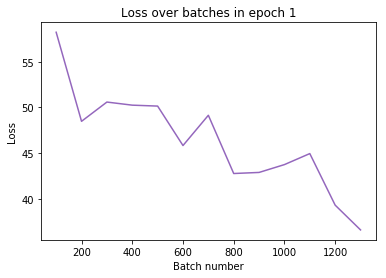

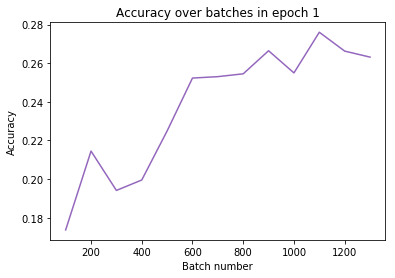

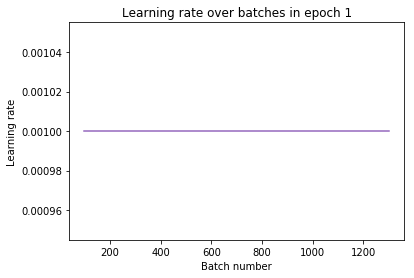

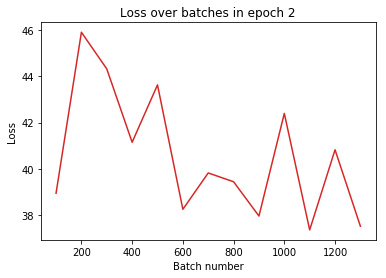

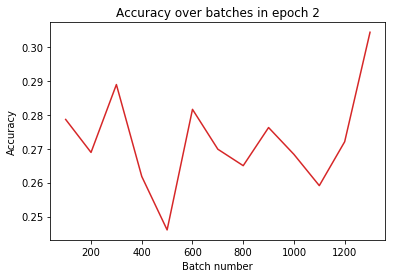

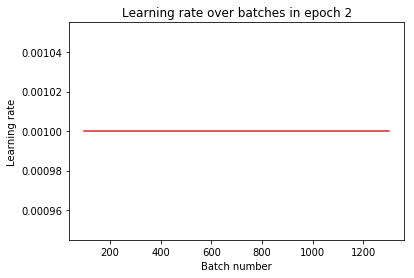

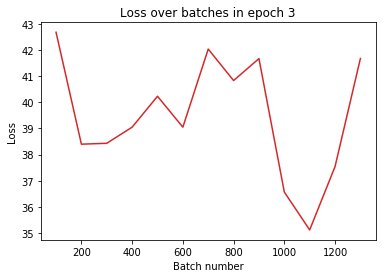

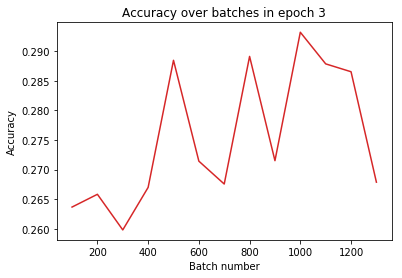

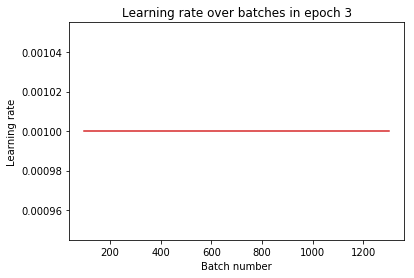

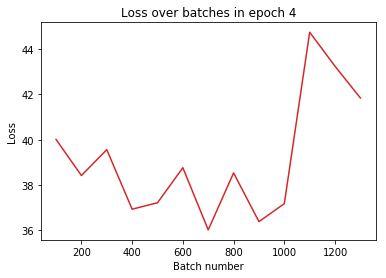

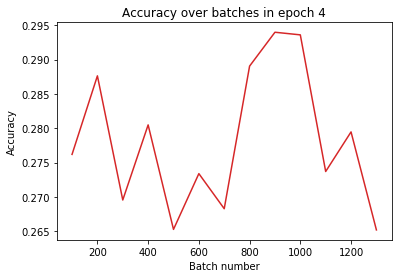

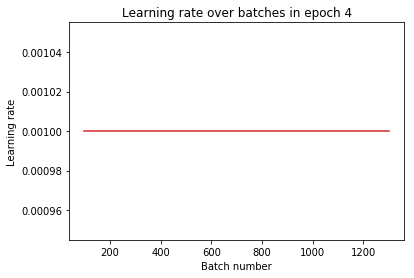

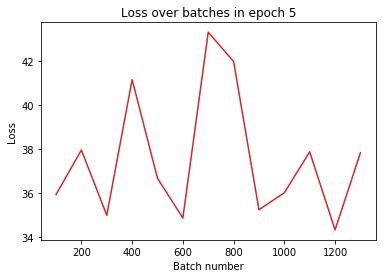

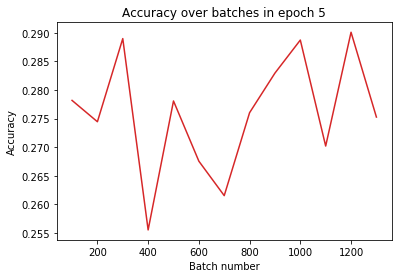

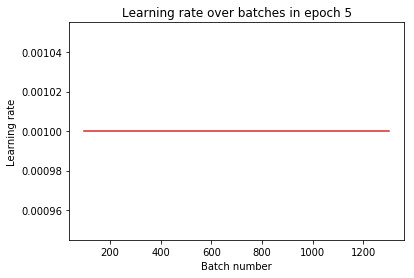

In [5]:
# Run model task 3
tf.reset_default_graph()

with tf.Session() as sess:

  print("Task 3")
  # some hyper-parameters
  # tweak them as you wish
  batch_size=128  # on CPU, use something much smaller e.g. 1-16
  max_length=30
  lr = 0.001
  lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
  emb_dim = 64
  mlp_dim = 128

  stats_tracker = StatsTracker()
  # our model
  model = NeuralIBM1Model_T3_coll(
    x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f,
    batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

  # our trainer
  trainer = NeuralIBM1Trainer_T2_gate(
    model, train_e_path, train_f_path,
    dev_e_path, dev_f_path, dev_wa,
    num_epochs=5, batch_size=batch_size,
    max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess)

  # now first TF needs to initialize all the variables
  print("Initializing variables..")
  sess.run(tf.global_variables_initializer())

  # now we can start training!
  print("Training started..")
  trainer.train(stats_tracker)